In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/Sinch/OneDrive/Desktop/Datasets/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Checkout for missing values and handle them 
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

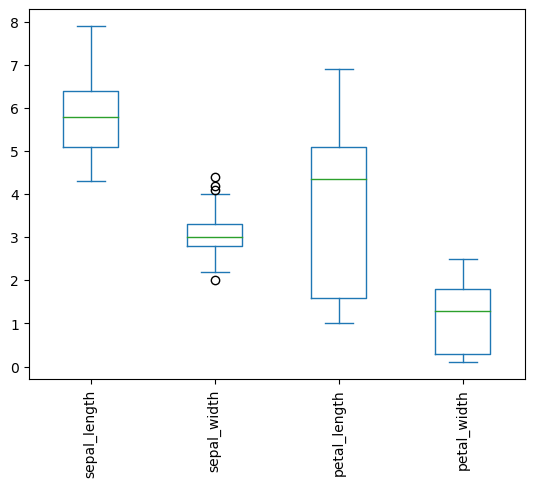

In [6]:
# Checkout for outliers and handle them
df.plot(kind='box')
plt.xticks(rotation=90)
plt.show()

Q1= 2.8
Q3= 3.3
IQR= 0.5
Lower= 2.05
Upper= 4.05
count    147.000000
mean       3.029932
std        0.402971
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.000000
Name: sepal_width, dtype: float64


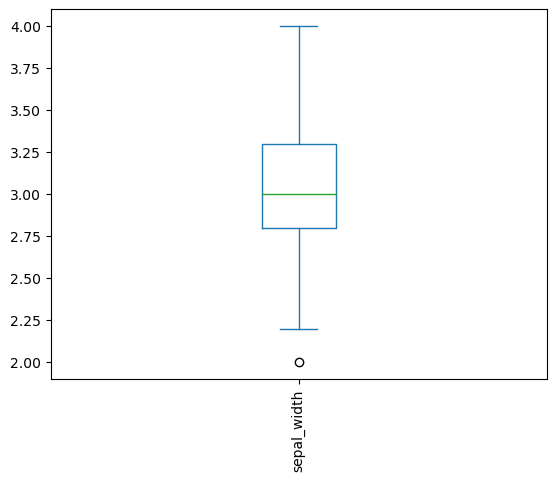

In [7]:
q1=df['sepal_width'].quantile(0.25)
q3=df['sepal_width'].quantile(0.75)
print("Q1=",q1)
print("Q3=",q3)
iqr=q3-q1
print("IQR=",iqr)
ll=q1-1.5*iqr
ul=q3+1.5*iqr
print("Lower=",ll)
print("Upper=",ul)
df=df[df['sepal_width']<ul]
print(df['sepal_width'].describe())
df['sepal_width'].plot(kind='box')
plt.xticks(rotation=90)
plt.show()

In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.851020,3.029932,3.805442,1.218367
std,0.834231,0.402971,1.751273,0.757973
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.000000,6.900000,2.500000


In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])
df

C:\Users\Sinch\AppData\Local\Temp\ipykernel_11412\741714543.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species']=le.fit_transform(df['species'])


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
#vertical splitting
X=df.drop('species',axis=1)
y=df['species'].values.reshape(-1,1)

In [11]:
X.shape , y.shape

((147, 4), (147, 1))

In [12]:
#horizontal splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (117, 4)
X_test shape: (30, 4)
y_train shape: (117, 1)
y_test shape: (30, 1)


# DecisionTreeClassification

In [14]:
#import model
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
#fitting the model
dtc.fit(X_train,y_train)
print("Training completed")

Training completed


In [15]:
#Training and Testing accuracy score
print('Training score',dtc.score(X_train,y_train))
print('Testing score',dtc.score(X_test,y_test))

Training score 1.0
Testing score 0.9666666666666667


In [16]:
print("accuracy: ",dtc.score(X,y)*100)

accuracy:  99.31972789115646


In [17]:
# Make predictions on the test set
y_pred = dtc.predict(X_test)

In [18]:
pred = dtc.predict(X_test)
pred

array([2, 1, 2, 0, 2, 0, 1, 0, 1, 0, 0, 1, 2, 2, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0])

In [19]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
cm

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]], dtype=int64)

<Axes: >

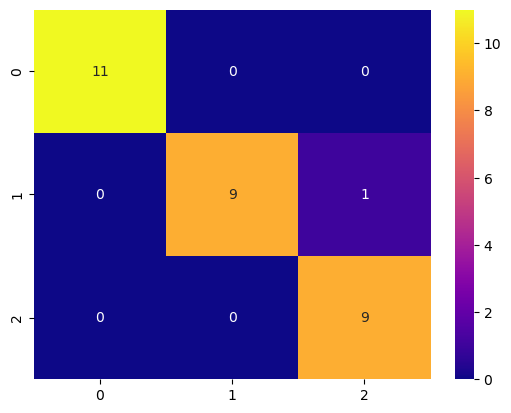

In [20]:
sns.heatmap(cm,annot=True,cmap='plasma')

In [21]:
#classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [22]:
y_test_r=y_test.ravel()
pred_r=pred.ravel()
actual=pd.DataFrame({'Actual':y_test_r,'Prediction':pred_r})
actual

,Actual,Prediction
0,2,2
1,1,1
2,2,2
3,0,0
4,2,2
5,0,0
6,1,1
7,0,0
8,1,1
9,0,0
